### Who doesn't love a little holiday getaway? Nobody that's who!

Let's take a look at the hotel bookings of some holidaymakers and try to understand their accommodation requirements for maximum relaxation.

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",100)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
params={"axes.titlesize":16,
        "axes.titleweight":"bold",
        "axes.titlelocation":"center"}
plt.rcParams.update(params)
import warnings
warnings.filterwarnings("ignore")

The data includes information on bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017. The information (i.e. columns) includes:
* **hotel**: types of hotel
        Resort Hotel
        City Hotel
* **is_canceled**: if the booking was canceled
        0 - not canceled
        1 - canceled
* **lead_time**: the number of days between the booking date and the arrival date    
* **arrival_date_year**: year of arrival (2015-2017)
* **arrival_date_month**: month of arrival (January-December)
* **arrival_date_week_number**: week number of arrival (1-53)
* **arrival_date_day_of_month**: day of arrival (1-31)
* **stays_in_weekend_nights**: number of weekend nights (Saturday or Sunday) booked 
* **stays_in_week_nights**: number of week nights (Monday to Friday) booked 
* **adults**: number of adults
* **children**: number of children
* **babies**: number of babies
* **meal**: type of meal booked
        Undefined/SC – no meal package
        BB – bed & breakfast
        HB – half board (breakfast and one other meal – usually dinner)
        FB – full board (breakfast, lunch and dinner)
* **country**: country of origin
* **market_segment**: market segment designation, where TA is travel agent and TO is tour operator
* **distribution_channel**: booking distribution channel, where TA is travel agent and TO is tour operator
* **is_repeated_guest**: if the booking name was a repeated guest
        0 - first time guest
        1 - repeated guest
* **previous_cancellations**: number of previous bookings that were canceled by the guest prior to the current booking
* **previous_bookings_not_canceled**: number of previous bookings that were not canceled by the guest prior to the current booking
* **reserved_room_type**: code of the room type reserved
* **assigned_room_type**: code of the room type assigned 
* **booking_changes**: number of changes made to the booking from the booking time to the arrival time
* **deposit_type**: if the guest made a deposit to guarantee the booking
        No Deposit – no deposit was made
        Non Refund – a deposit was made in the value of the total stay cost
        Refundable – a deposit was made with a value under the total cost of stay
* **agent**: ID of the travel agent that made the booking if any
* **company**: ID of the company that made the booking if any
* **days_in_waiting_list**: number of days the booking was in the waiting list before it was confirmed by the guest
* **customer_type**: type of booking
        Contract - the booking has an allotment or other type of contract associated to it
        Group – the booking is associated to a group
        Transient – the booking is not part of a group or contract, and is not associated to other transient booking
        Transient-party – the booking is transient, but is associated to at least other transient booking
* **adr**: average daily rate
* **required_car_parking_spaces**: number of car parking spaces required by the guest
* **total_of_special_requests**: number of special requests (e.g. twin bed/high floor) made by the guest
* **reservation_status**: latest reservation status
        Canceled - booking was canceled by the guest
        Check-Out - guest has checked in but already departed
        No-Show - guest did not check-in and informed the hotel
* **reservation_status_date**: date at which the last *reservation_status* was set

In [2]:
df=pd.read_csv("../input/hotel-booking-demand/hotel_bookings.csv")
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [3]:
print("There were {num} bookings!".format(num=df.shape[0]))

There were 119390 bookings!


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Check for any null values:

In [5]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

There are some null values in the *company*, *agent*, *country* and *children* columns. Luckily null values in these columns are rather intuitive:

* if there is no *company*, the booking could most likely have been made privately, and so these null values can be changed to 0
* if there is no *agent*, the booking could most likely have been made without an agent, and so these null values can be changed to 0
* if the *country* is a null value, we can just list it as unknown
* if there are null values of *children*, the number of children can be assumed 0

(alternatively the company and agent columns could have been dropped, rows with null country values could have been dropped and/or null values of children could be replaced with another number/mean)

In [6]:
null_replacements={"company":0,"agent":0,"country":"Unknown","children":0}
df.fillna(null_replacements,inplace=True)

Now there are no more null values! Yay!

In [7]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Let's look at the numeric features:

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Apparently there are bookings with 0 adults - seems a little bit irresponsible to book a hotel room just for children and/or babies but who am I to judge? Anyway let's filter out the data where there were no guests (i.e. 0 adults, 0 children and 0 babies):

In [9]:
df.drop(df.loc[(df["adults"]==0)&(df["children"]==0)&(df["babies"]==0)].index,inplace=True)

In [10]:
print("Now instead of the inital 119390, we have {num} bookings.".format(num=df.shape[0]))

Now instead of the inital 119390, we have 119210 bookings.


I doubt a hotel can have a negative average daily rate, so let's change this to just 0 instead:

In [11]:
df["adr"].loc[df["adr"]<0]=0

In [12]:
df["adr"].min()

0.0

Again, I am not a hotelier, but an average daily rate of €5400 seems a little too extreme when the next closest rate is €510. I'm assuming it's just a typo for €540, so let's change this too:

In [13]:
df["adr"].loc[df["hotel"]=="City Hotel"].sort_values(ascending=False).head(5)

48515     5400.00
111403     510.00
103912     451.50
103789     375.50
118515     372.33
Name: adr, dtype: float64

In [14]:
df["adr"].loc[df["adr"]==5400]=540

In [15]:
df["adr"].loc[df["hotel"]=="City Hotel"].sort_values(ascending=False).head(5)

48515     540.00
111403    510.00
103912    451.50
103789    375.50
118515    372.33
Name: adr, dtype: float64

And now for the categorical features:

In [16]:
for col in df.select_dtypes(include=["object"]).drop(["country","reservation_status_date"],axis=1):
    print(col)
    print(df.select_dtypes(include=["object"]).drop(["country","reservation_status_date"],axis=1)[col].value_counts())
    print("")

hotel
City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

arrival_date_month
August       13861
July         12644
May          11780
October      11147
April        11078
June         10929
September    10500
March         9768
February      8052
November      6771
December      6759
January       5921
Name: arrival_date_month, dtype: int64

meal
BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64

market_segment
Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

distribution_channel
TA/TO        97750
Direct       14611
Corporate     6651
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

reserved_room_type
A    85873
D    19179
E     6519
F     2894
G     2092
B     1115
C      931
H      601
L        6

There are a couple undefined values in the *market_segment* and *distribution_channel* columns which are acceptable. But the undefined values in the *meal* column should be lumped into the SC category (meaning no meal package):

In [17]:
df["meal"].replace("Undefined","SC",inplace=True)

In [18]:
df["meal"].value_counts()

BB    92236
HB    14458
SC    11718
FB      798
Name: meal, dtype: int64

Now we are ready to do some exploratory data analysis!

Text(0.5, 0.93, 'Which hotels are guests booking?')

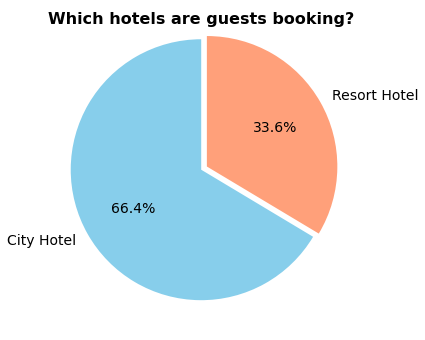

In [19]:
hotel=pd.DataFrame(df["hotel"].value_counts().to_list(),index=df["hotel"].value_counts().index.to_list())

hotel[0].plot(kind="pie",figsize=(8,6),autopct="%1.1f%%",startangle=90,explode=[0,0.05],colors=["skyblue","lightsalmon"],textprops={"fontsize":14})
plt.ylabel("")
plt.title("Which hotels are guests booking?",y=0.93)

Almost a third of the bookings are for city hotels, but these include bookings that were both canceled and not canceled which leads to the next graph:

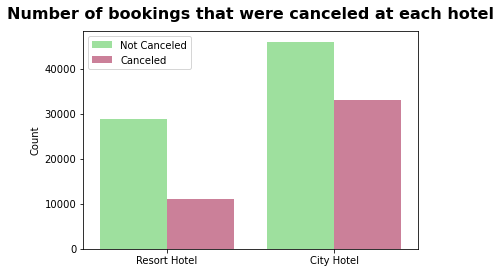

In [20]:
ax=sns.countplot(x=df["hotel"],hue=df["is_canceled"],palette={0:"lightgreen",1:"palevioletred"},saturation=0.7)
plt.title("Number of bookings that were canceled at each hotel",y=1.03)
plt.xlabel("")
plt.ylabel("Count")
plt.legend(("Not Canceled","Canceled"))

Almost three quarters of the bookings at the City Hotel were canceled, while only less than half were canceled at the Resort Hotel. Maybe guests are more prone to cancelling their booking if they don't have to pay a deposit?

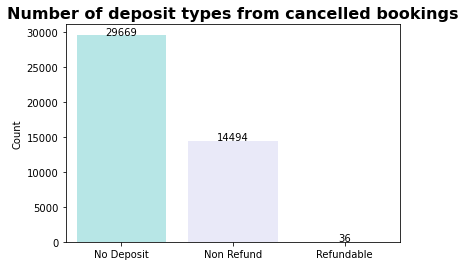

In [21]:
ax=sns.countplot(df["deposit_type"].loc[df["is_canceled"]==1],palette={"No Deposit":"paleturquoise","Non Refund":"lavender","Refundable":"black"})
plt.xlabel("")
plt.ylabel("Count")
plt.title("Number of deposit types from cancelled bookings")

i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+0.1,
        df["deposit_type"].loc[df["is_canceled"]==1].value_counts()[i],ha="center")
    i += 1

In [22]:
df["is_canceled"].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

Almost 30,000 of the 44,000+ cancelled bookings (67%) were cancelled because *No Deposit* was made thus the guest was not going to lose any money from the cancellation. On the other hand, even when a deposit valuing the total stay cost was made (i.e. *Non Refund*), a third of the guests still cancelled their booking - they must have had a rather important reason to lose their booking and therefore their money or maybe they're just a little bit dodgy.

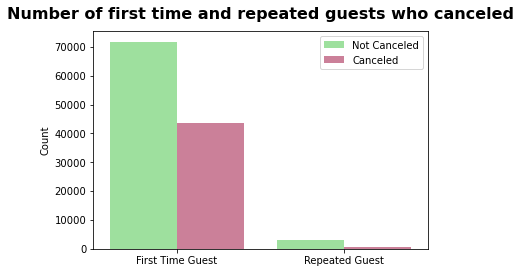

In [23]:
sns.countplot(df["is_repeated_guest"],hue=df["is_canceled"],palette={0:"lightgreen",1:"palevioletred"},saturation=0.7)
plt.title("Number of first time and repeated guests who canceled",y=1.03)
plt.xlabel("")
plt.xticks((0,1),("First Time Guest","Repeated Guest"))
plt.ylabel("Count")
plt.legend(("Not Canceled","Canceled"))

Most of the guests are first time guests, and more than half of them cancelled their booking! Are they serial cancellers? 

Text(0, 0.5, '')

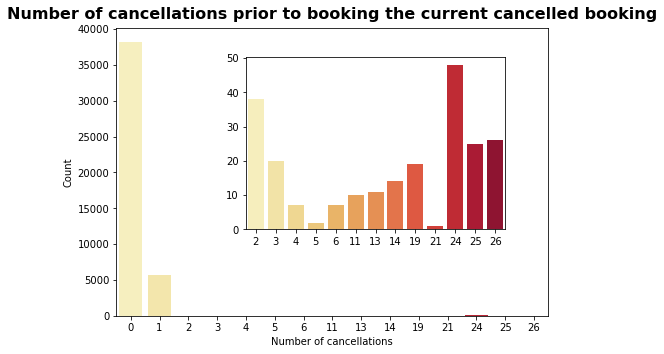

In [24]:
fig=plt.figure()
ax1=fig.add_axes([0,0,1,1])
ax2=fig.add_axes([0.3,0.3,0.6,0.6])
sns.countplot(df["previous_cancellations"].loc[(df["is_canceled"]==1)],palette="YlOrRd",ax=ax1)
sns.countplot(df["previous_cancellations"].loc[(df["is_canceled"]==1)&(df["previous_cancellations"]!=0)&(df["previous_cancellations"]!=1)],palette="YlOrRd",ax=ax2)
ax1.set_title("Number of cancellations prior to booking the current cancelled booking",fontweight="bold",fontsize=16,y=1.01)
ax1.set_xlabel("Number of cancellations")
ax2.set_xlabel("")
ax1.set_ylabel("Count")
ax2.set_ylabel("")

In [25]:
df["previous_cancellations"].loc[(df["is_canceled"]==1)].value_counts()

0     38259
1      5712
24       48
2        38
26       26
25       25
3        20
19       19
14       14
13       11
11       10
6         7
4         7
5         2
21        1
Name: previous_cancellations, dtype: int64

The good news is that out of the 44199 cancelled bookings, this current cancelled booking was 38259 (86.5%) guests' first cancellation so the guests aren't willy nilly booking and cancelling for the sake of it. There are 5700+ (12.9%) guests who have cancelled one prior booking, which I wouldn't consider as bad behaviour just yet. But now the bad news is that the remaining 0.6% of guests seem to have a bad habit of cancelling bookings even up to 26 times! Do these guests seriously consider their bookings or it is just a spur of the moment?

(0.5, 9.5)

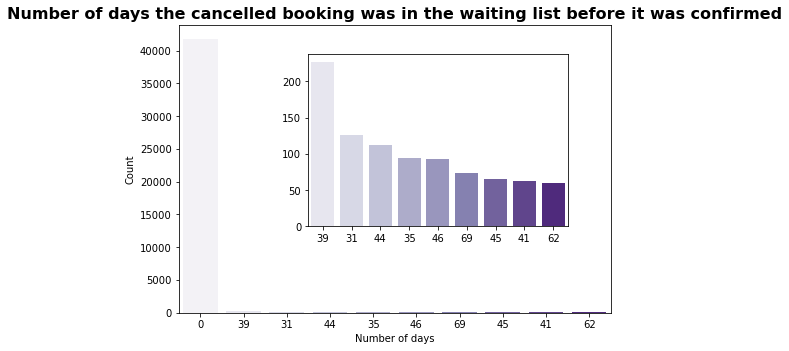

In [26]:
waitinglist=pd.DataFrame({"Days":df["days_in_waiting_list"].loc[(df["is_canceled"]==1)].value_counts().head(10).index,"Count":df["days_in_waiting_list"].loc[(df["is_canceled"]==1)].value_counts().head(10).values})
waitinglistorder=[0,39,31,44,35,46,69,45,41,62]

fig=plt.figure()
ax1=fig.add_axes([0,0,1,1])
ax2=fig.add_axes([0.3,0.3,0.6,0.6])
sns.barplot(x=waitinglist["Days"],y=waitinglist["Count"],order=waitinglistorder,palette="Purples",ax=ax1)
sns.barplot(x=waitinglist["Days"].drop([0]),y=waitinglist["Count"].drop([0]),order=waitinglistorder,palette="Purples",ax=ax2)
ax1.set_title("Number of days the cancelled booking was in the waiting list before it was confirmed",fontweight="bold",fontsize=16)
ax1.set_xlabel("Number of days")
ax2.set_xlabel("")
ax1.set_ylabel("Count")
ax2.set_ylabel("")
ax2.set_xlim([0.5,9.5])

Seems like most of the guests are spontaneous as over 40000 of them confirm their (cancelled) booking within the day. Others seems to ponder over their booking for a little longer, between one to two months, before confirming it.

So then who are these guests?

In [27]:
import folium
import json

country_geo=json.load(open("../input/python-folio-country-boundaries/world-countries.json"))
country=pd.DataFrame({"Country":df["country"].value_counts().index.to_list(),"Number":df["country"].value_counts().to_list()})

m=folium.Map(width=600,height=400,location=[39.3999,8.2245],zoom_start=2)
m.choropleth(geo_data=country_geo,data=country,columns=["Country","Number"],key_on="feature.id",fill_color="PuRd",fill_opacity=0.7,line_opacity=2,legend_name="Number of Guests")
m

Text(0.5, 1.0, 'Top 20 guests country of origin')

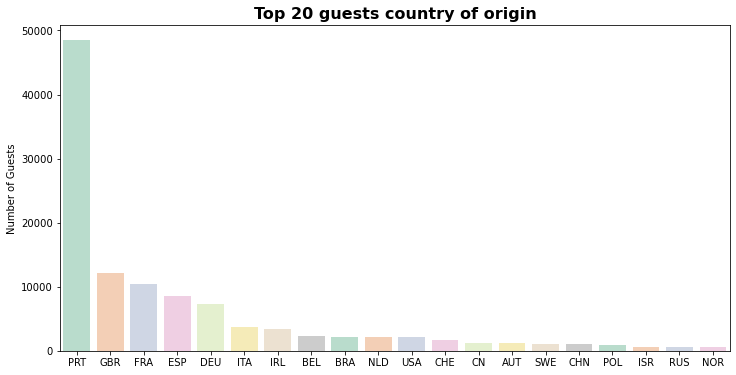

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x=country["Country"].head(20),y=country["Number"].head(20),palette="Pastel2")
plt.xlabel("")
plt.ylabel("Number of Guests")
plt.title("Top 20 guests country of origin")

Oh yes, something to be pointed out is that these hotels are based in Portugal! So most of the guests are local tourists, followed by the British, French and Spanish.

Text(0.5, 0.98, 'Number of adults, children and babies')

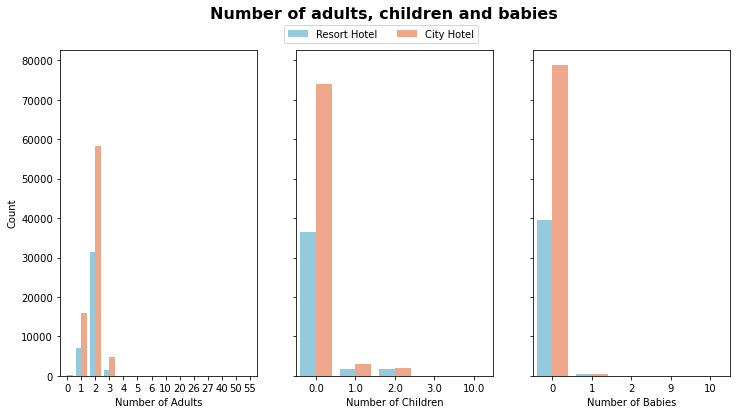

In [29]:
fig,axes=plt.subplots(1,3,sharey=True,figsize=(12,6))
sns.countplot(df["adults"],hue=df["hotel"],palette=["skyblue","lightsalmon"],ax=axes[0])
sns.countplot(df["children"],hue=df["hotel"],palette=["skyblue","lightsalmon"],ax=axes[1])
sns.countplot(df["babies"],hue=df["hotel"],palette=["skyblue","lightsalmon"],ax=axes[2])
axes[0].set_xlabel("Number of Adults")
axes[1].set_xlabel("Number of Children")
axes[2].set_xlabel("Number of Babies")
axes[0].set_ylabel("Count")
axes[1].set_ylabel("")
axes[2].set_ylabel("")
axes[0].get_legend().set_visible(False)
axes[1].legend(ncol=2,bbox_to_anchor=(0.95,1.09))
axes[2].get_legend().set_visible(False)
plt.suptitle("Number of adults, children and babies",fontweight="bold",fontsize=16,y=0.98)

Majority of the adults are pairs, but this can go up to a huge party of 55. Almost all of the guests holiday without any children or babies, and those that do don't have too huge a preference in terms of a resort or a city hotel, perhaps just a slight lean towards a city hotel.

Hang on now, I'm still curious about the bookings made for children and/or babies without any adult:

Text(0.5, 0.97, 'Number of children and babies on holiday without an adult')

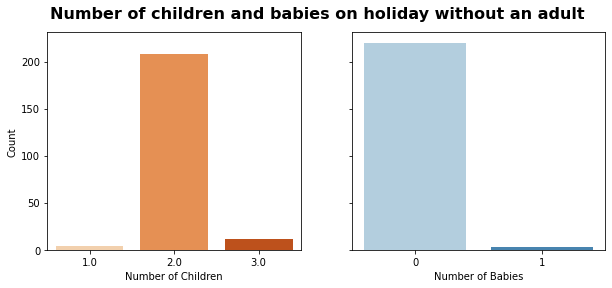

In [30]:
fig,axes=plt.subplots(1,2,sharey=True,figsize=(10,4))
sns.countplot(df["children"].loc[df["adults"]==0],palette="Oranges",ax=axes[0])
sns.countplot(df["babies"].loc[df["adults"]==0],palette="Blues",ax=axes[1])
axes[0].set_xlabel("Number of Children")
axes[1].set_xlabel("Number of Babies")
axes[0].set_ylabel("Count")
axes[1].set_ylabel("")
plt.suptitle("Number of children and babies on holiday without an adult",fontweight="bold",fontsize=16,y=0.97)

In [31]:
df["children"].loc[(df["adults"]==0)&(df["babies"]==1)]

46150    2.0
81375    2.0
90790    2.0
Name: children, dtype: float64

So there really are bookings of just children and even babies without an adult. Rather than being on their own, at least the babies have a child to supervise them...

But who are these guests doing the bookings?

Text(0, 0.5, 'Count')

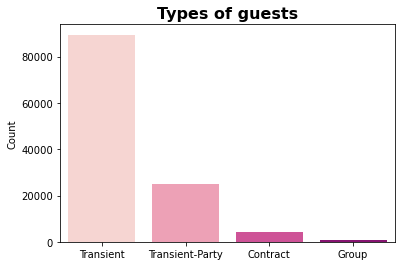

In [32]:
sns.countplot(df["customer_type"],order=df["customer_type"].value_counts().index,palette="RdPu")
plt.title("Types of guests")
plt.xlabel("")
plt.ylabel("Count")

In [33]:
df["customer_type"].value_counts()

Transient          89476
Transient-Party    25088
Contract            4072
Group                574
Name: customer_type, dtype: int64

About 96% of the guests are transient where 78% of them are part of a party (i.e. *Transient*) and 22% of them are not (i.e. *Transient-Party*). *Contract* and *Group* bookings make up the remaining 4% with 4072 and 574 respectively.

Text(0.5, 0.97, 'Market segments and distribution channels')

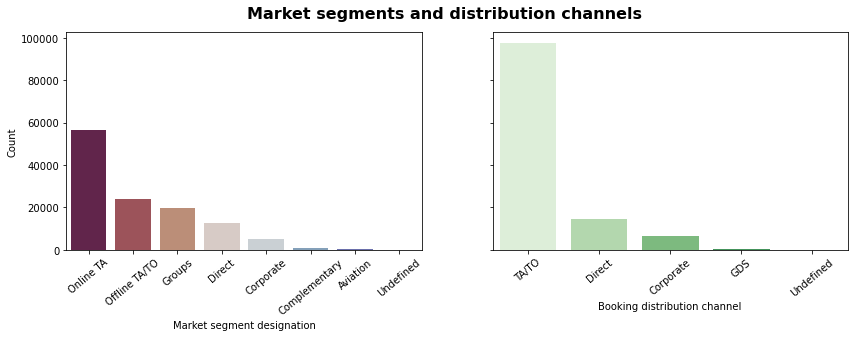

In [34]:
fig,axes=plt.subplots(1,2,sharey=True,figsize=(14,4))
sns.countplot(df["market_segment"],order=df["market_segment"].value_counts().index,palette="twilight_shifted_r",ax=axes[0])
sns.countplot(df["distribution_channel"],order=df["distribution_channel"].value_counts().index,palette="Greens",ax=axes[1])
axes[0].set_xlabel("Market segment designation")
axes[1].set_xlabel("Booking distribution channel")
axes[0].set_xticklabels(df["market_segment"].value_counts().index,rotation=40)
axes[1].set_xticklabels(df["distribution_channel"].value_counts().index,rotation=40)
axes[0].set_ylabel("Count")
axes[1].set_ylabel("")
plt.suptitle("Market segments and distribution channels",fontweight="bold",fontsize=16,y=0.97)

In [35]:
df["agent"].value_counts().head(3)

9.0      31922
0.0      16280
240.0    13922
Name: agent, dtype: int64

Majority of the guests booked the hotels through both online and offline travel agents and tour operators (i.e. *Online TA, Offline TA/TO, TA/TO*) as opposed to *Direct* bookings themselves and *Corporate* bookings. It may be wise to direct marketing strategies to these travel agents and tour operators, especially agent 9, 0 and 240.

Let's see what else the guests are requesting:

Text(0.5, 0.97, 'Number of requests')

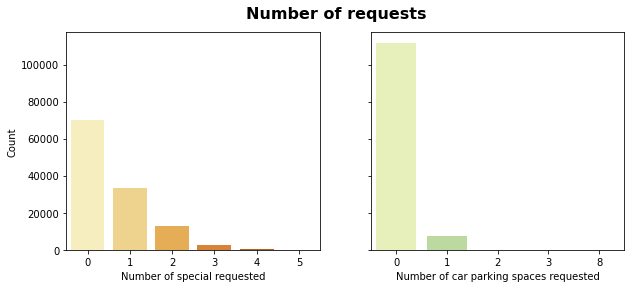

In [36]:
fig,axes=plt.subplots(1,2,sharey=True,figsize=(10,4))
sns.countplot(df["total_of_special_requests"],palette="YlOrBr",ax=axes[0])
sns.countplot(df["required_car_parking_spaces"],palette="YlGn",ax=axes[1])
axes[0].set_xlabel("Number of special requested")
axes[1].set_xlabel("Number of car parking spaces requested")
axes[0].set_ylabel("Count")
axes[1].set_ylabel("")
plt.suptitle("Number of requests",fontweight="bold",fontsize=16,y=0.97)

The number of special requests ranges from 0 to 5, with about half being 0. The number of car parking spaces requests ranges from 0 to 8, with majority of them being 0.

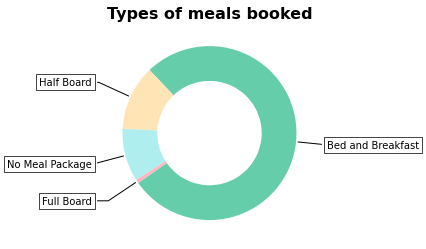

In [37]:
fig,ax=plt.subplots(figsize=(8,4),subplot_kw=dict(aspect="equal"))

labels=["Bed and Breakfast","Half Board","No Meal Package","Full Board"]
values=df["meal"].value_counts().to_list()

wedges,texts=ax.pie(values,wedgeprops=dict(width=0.4),startangle=215,colors=["mediumaquamarine","moccasin","paleturquoise","lightpink"])

kw=dict(arrowprops=dict(arrowstyle="-"),bbox=dict(boxstyle="square,pad=0.3",fc="w",ec="k",lw=0.72),zorder=0,va="center")

for i,p in enumerate(wedges):
    ang=(p.theta2-p.theta1)/2.+p.theta1
    y=np.sin(np.deg2rad(ang))
    x=np.cos(np.deg2rad(ang))
    horizontalalignment={-1:"right",1:"left"}[int(np.sign(x))]
    connectionstyle="angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle":connectionstyle})
    ax.annotate(labels[i],xy=(x,y),xytext=(1.35*np.sign(x),1.4*y),horizontalalignment=horizontalalignment,**kw)

ax.set_title("Types of meals booked")

plt.show()

In [38]:
df["meal"].value_counts()

BB    92236
HB    14458
SC    11718
FB      798
Name: meal, dtype: int64

Approximately 77% of the guests opt for bed and breakfast, followed by 12% for half board which is breakfast and one other meal (usually dinner), 10% for no meal, and the remaining 1% for full board which is breakfast, lunch and dinner.

So how early are guests booking their hotels?

Text(0, 0.5, 'Count')

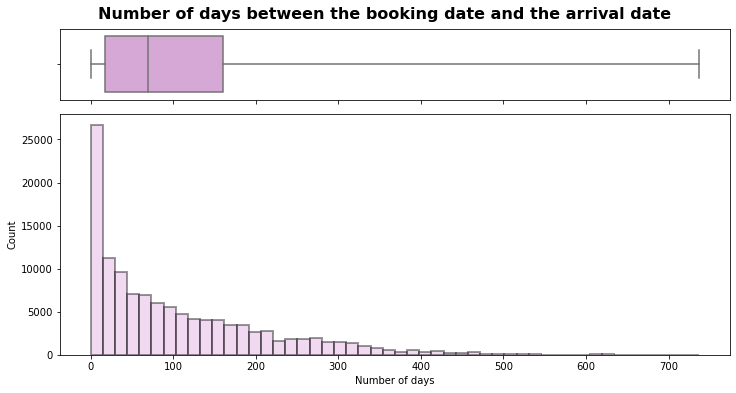

In [39]:
fig=plt.figure(figsize=(12,6))
ax1=plt.subplot2grid((4,1),(0,0))
ax2=plt.subplot2grid((4,1),(1,0),rowspan=3)
sns.boxplot(df["lead_time"],whis=30,color="plum",ax=ax1)
sns.distplot(a=df["lead_time"],kde=False,color="plum",hist_kws=dict(edgecolor="black",linewidth=2),ax=ax2)
plt.suptitle("Number of days between the booking date and the arrival date",fontweight="bold",fontsize=16,y=0.93)
ax1.set_xlabel("")
ax1.set_xticklabels([])
ax2.set_xlabel("Number of days")
ax2.set_ylabel("Count")

In [40]:
df["lead_time"].describe()

count    119210.000000
mean        104.109227
std         106.875450
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

Most guests book their hotel the day of arriving, and this number continues to decrease to a maximum of 737 days. The median number of days a guest books their hotel in advance in 69 days, while the average number of days is 104.

Now when are they arriving?

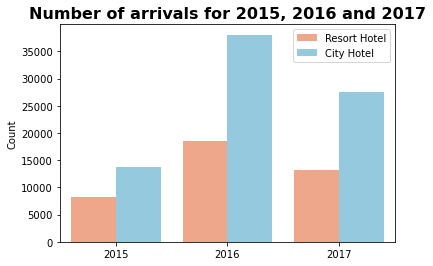

In [41]:
sns.countplot(df["arrival_date_year"],hue=df["hotel"],palette=["lightsalmon","skyblue"])
plt.title("Number of arrivals for 2015, 2016 and 2017")
plt.xlabel("")
plt.ylabel("Count")
plt.legend()

2016 was the best year with the highest number of arrivals for both the Resort Hotel and the City Hotel.

Text(0, 0.5, 'Count')

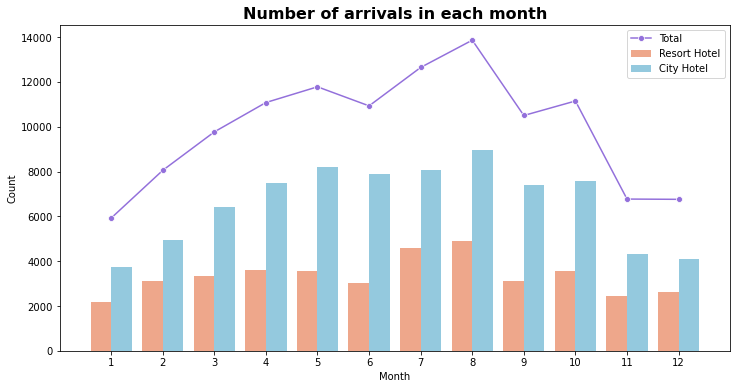

In [42]:
months_map={"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12}
df["arrival_date_month"]=df["arrival_date_month"].map(months_map)

plt.figure(figsize=(12,6))
sns.countplot(df["arrival_date_month"],hue=df["hotel"],palette=["lightsalmon","skyblue"])
sns.lineplot(x=df["arrival_date_month"].value_counts().index-1,y=df["arrival_date_month"].value_counts().values,color="mediumpurple",marker="o",label="Total")
plt.title("Number of arrivals in each month")
plt.xlabel("Month")
plt.ylabel("Count")

Despite the disparity per year, there was a slight trend with a higher number of arrivals during the summer months which could be due to summer holidays for the children and also just the nicer weather!

Text(0, 0.5, 'Count')

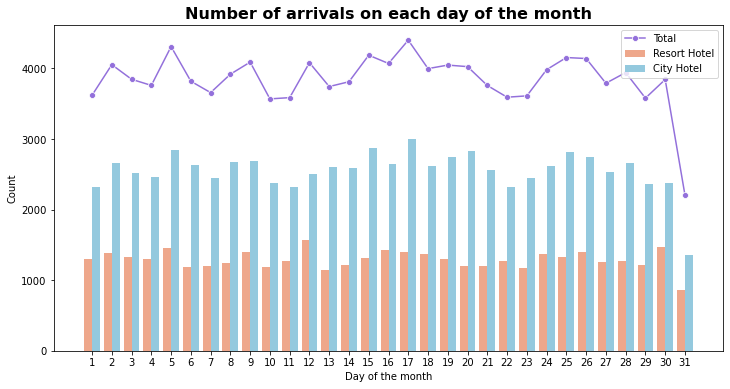

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(df["arrival_date_day_of_month"],hue=df["hotel"],palette=["lightsalmon","skyblue"])
sns.lineplot(x=df["arrival_date_day_of_month"].value_counts().index-1,y=df["arrival_date_day_of_month"].value_counts().values,color="mediumpurple",marker="o",label="Total")
plt.title("Number of arrivals on each day of the month")
plt.xlabel("Day of the month")
plt.ylabel("Count")

The number of arrivals for each day of the month does not seem follow any pattern, except that guests to not like to arrive at the end of the month. Perhaps it would be more intuitive to look into arrivals on either the weekend or weekday as the day of the month changes every month anyway:

Text(0.5, 0.98, 'Number of weekend/weekday nights booked')

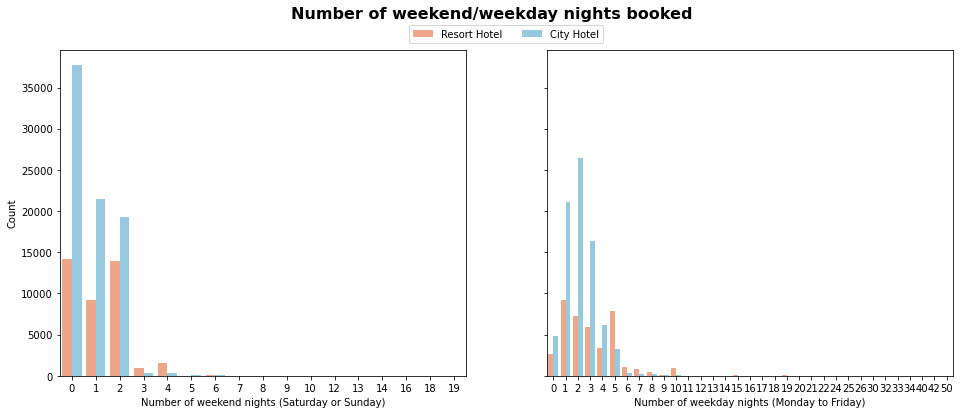

In [44]:
fig,axes=plt.subplots(1,2,sharey=True,figsize=(16,6))
sns.countplot(df["stays_in_weekend_nights"],hue=df["hotel"],palette=["lightsalmon","skyblue"],ax=axes[0])
sns.countplot(df["stays_in_week_nights"],hue=df["hotel"],palette=["lightsalmon","skyblue"],ax=axes[1])
axes[0].set_xlabel("Number of weekend nights (Saturday or Sunday)")
axes[1].set_xlabel("Number of weekday nights (Monday to Friday)")
axes[0].set_ylabel("Count")
axes[1].set_ylabel("")
axes[0].get_legend().set_visible(False)
axes[1].legend(ncol=2,bbox_to_anchor=(0.15,1.09))
plt.suptitle("Number of weekend/weekday nights booked",fontweight="bold",fontsize=16,y=0.98)

Guests are more likely to book a hotel over the weekday as majority of the guests don't even stay over for one weekend night, and the number of weekday nights booked even extends to 50! I guess some guests are having a really long holiday, and probably an expensive one too right?

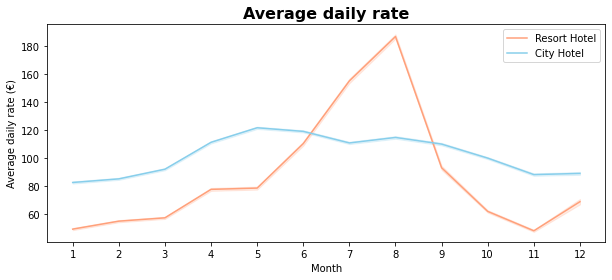

In [45]:
fig,axes=plt.subplots(figsize=(10,4))
sns.lineplot(x=df["arrival_date_month"],y=df["adr"],hue=df["hotel"],palette=["lightsalmon","skyblue"],ci=95)
plt.title("Average daily rate")
plt.ylabel("Average daily rate (€)")
plt.xlabel("Month")
plt.xticks(range(1,13))
handles,labels=axes.get_legend_handles_labels()
axes.legend(handles=handles[1:],labels=labels[1:])

In [46]:
df.groupby(["hotel"]).adr.agg(["mean","std","min","median","max"])

,mean,std,min,median,max
hotel,,,,,
City Hotel,105.441798,39.147104,0.0,99.96,540.0
Resort Hotel,94.983213,61.429231,0.0,75.00,508.0


In [47]:
df.groupby(["hotel","arrival_date_month"]).adr.agg(["mean","std","min","median","max"])

mean        std  min   median     max
hotel        arrival_date_month                                             
City Hotel   1                    82.754477  25.173911  0.0   80.000  284.20
             2                    85.327519  28.480940  0.0   80.000  284.20
             3                    92.217976  30.897528  0.0   88.000  540.00
             4                   111.397415  35.923953  0.0  105.000  336.00
             5                   121.764614  39.787555  0.0  120.000  510.00
             6                   119.186056  35.928224  0.0  117.850  333.67
             7                   110.945950  41.673032  0.0  107.100  365.00
             8                   114.857330  45.807574  0.0  109.000  372.33
             9                   110.120296  41.784564  0.0  107.000  345.00
             10                  100.119313  33.625293  0.0   99.980  300.00
             11                   88.372486  30.252303  0.0   85.000  260.00
             12                   89.209560  34.613736  0.0   85.000  451.50
Resort Hotel 1                    49.507033  19.663872  0.0   47.720  149.00
             2                    55.189716  21.853552  0.0   51.000  174.00
             3                    57.556566  24.293027  0.0   55.615  193.71
             4                    77.849496  32.007703  0.0   75.000  270.00
             5                    78.758134  33.351698  0.0   73.000  225.50
             6                   110.481032  44.370322  0.0  105.000  318.82
             7                   155.181299  56.022916  0.0  152.500  508.00
             8                   186.790574  59.450543  0.0  188.420  450.00
             9                    93.252030  43.283535  0.0   86.000  307.50
             10                   62.132572  26.584278  0.0   58.000  246.02
             11                   48.313643  19.744415  0.0   45.000  175.00
             12                   69.051887  50.207420  0.0   58.000  384.00

The average daily rate is equal to the average price for each hotel room sold for that day. The average daily rate fluctuates more for resort hotels than city hotels with standard deviations of €61 and €39 respectively. This is especially evident during the summer months (June, July, August and September) with prices ranging from €93 to €186. The winter months (December, January, February and March) have generally lower prices ranging from €69 to €57, except that there is a little peak in December which is probably due to Christmas and New Years. Even with the seasonal prices, it is the city hotels that maintain a higher price with a higher mean and median throughout the year.

### Still thinking about going for a holiday? Well consider these next time you plan for your trip:
* Almost a third of the total guests opt for a city hotel instead of a resort hotel.
* If your preferred hotel is "sold out", don't fret because some of the guests are definitely going to cancel their booking especially if there way no deposit required. 
* If you are going to cancel your booking, it doens't matter if you're a first time guest or a repeated guest, and you don't have to feel bad because remember there are some guests out there who cancelled 26 times sometimes within the day or even after 2 months!
* Your fellow holidaymakers would more likely comprise of a couple, or just a small family of up to 2 children and/or 1 baby.
* Summer months are more expensive for resort hotels while the prices for city hotels don't really flunctuate throughout the year.

Have fun now!